I tried to cite every possible source/reference I used for this assignment. I am very sorry if I forgot a citation somewhere. I mainly reffered to my own teams code from the team task, notes from class as well as my own code from past member tasks.

Importing necessary libraries and files

In [284]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
from sklearn.linear_model import LinearRegression

cases = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
deaths = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')
employment = pd.read_csv('../../../../data/stage_1/employment.csv')
hospital = pd.read_csv('../../../../data/stage_1/Weekly_Hospital_Capacity.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



Gathering state data, for my state of choice I decided to go with North Carolina

Reference - https://github.com/UNCG-CSE/Spring-22_COVID-Team_2/blob/development-branch/src/member/jacky%20luo/stage_2/Stage%202_Member%20Task.ipynb

In [23]:
# Using own member code from stage 2 to get state data
nc_cases = cases.loc[cases['State'] == 'NC']
nc_deaths = deaths.loc[deaths['State'] == 'NC']

Code borrowed from Team IV Team Task

Reference - https://github.com/UNCG-CSE/Spring-22_COVID-Team_2/blob/development-branch/src/team/stage_4/Stage%20IV%20Team%20Deliverable.ipynb


In [89]:
# Code borrowed from Stage IV Team Task
nc_cases_cropped = nc_cases.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)
nc_deaths_cropped = nc_deaths.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)

# Not entirely sure if cropping columns was actually necessary, my teammates
# and I discussed this and we ended up coming to the conclusion that it was needed for the code to work
nc_cases_total = nc_cases_cropped.sum()
nc_deaths_total = nc_deaths_cropped.sum()

In [46]:
# Code borrowed from Stage II Team Task
new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = nc_cases_cropped.iloc[:,column] - nc_cases_cropped.iloc[:,column-1] 

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_40946/3414995447.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = nc_cases_cropped.iloc[:,column] - nc_cases_cropped.iloc[:,column-1]


In [64]:
# Code Borrowed from Stage IV Team Task
nc_new_cases = new_cases.sum()
nc_new_cases = nc_new_cases.to_frame()
nc_new_cases = nc_new_cases.drop([1]) 

# Creating new sections for days since and new cases
nc_new_cases = nc_new_cases.reset_index()
nc_new_cases = nc_new_cases.rename(columns={"index": "days_since", 0 : "new_cases"})
nc_new_cases['days_since'] = nc_new_cases['days_since'].apply(lambda x: x-2)
nc_new_cases

,days_since,new_cases
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
566,566,5889
567,567,6628
568,568,0
569,569,0


In [65]:
# Code borrowed from Stage II Team Task
new_deaths = pd.DataFrame()

for column in range(1,559):
  new_deaths[column] = nc_deaths_cropped.iloc[:,column] - nc_deaths_cropped.iloc[:,column-1]

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_40946/1793851833.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = nc_deaths_cropped.iloc[:,column] - nc_deaths_cropped.iloc[:,column-1]


In [56]:
nc_new_deaths = new_deaths.sum()
nc_new_deaths = nc_new_deaths.to_frame()

In [57]:
nc_new_deaths = nc_new_deaths.reset_index()
nc_new_deaths = nc_new_deaths.rename(columns={"index": "days_since", 0 : "new_deaths"})
nc_new_deaths['days_since'] = nc_new_deaths['days_since'].apply(lambda x: x-1)
nc_new_deaths

,days_since,new_deaths
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
553,553,12
554,554,17
555,555,0
556,556,0


Now that we have our data organized we can start visually displaying the data, for the following cells below I got the code/formula from my team task and altered it to fit my needed criteria

In [70]:
# Setting up our graph for cases
x = nc_new_cases['days_since']
y = nc_new_cases['new_cases']

lm = smf.ols(formula= 'y ~ x', data = nc_new_cases).fit()

lm.params

Intercept    759.547488
x              4.232104
dtype: float64

#### Polynomial

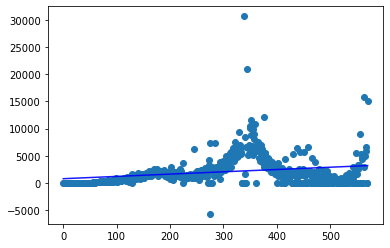

In [69]:
plt.scatter(nc_new_cases.days_since, nc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(nc_new_cases.days_since.min(), nc_new_cases.days_since.max(), 571)})


plt.plot(nc_new_cases.days_since, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9)

And now we generate a linear model

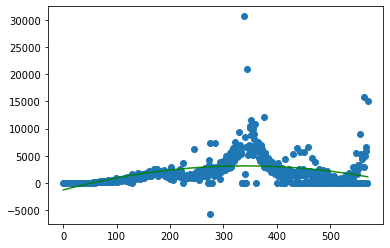

In [72]:
plt.scatter(nc_new_cases.days_since, nc_new_cases.new_cases)

lm_poly_2 = smf.ols(formula='new_cases ~ 1 + nc_new_cases.days_since + I(nc_new_cases.days_since ** 2.0)', 
                    data=nc_new_cases).fit()
plt.plot(nc_new_cases.days_since, lm_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % lm_poly_2.rsquared, alpha=0.9)

In [73]:
lm_poly_2.params

Intercept                           -1305.789363
nc_new_cases.days_since                26.010700
I(nc_new_cases.days_since ** 2.0)      -0.038208
dtype: float64

In [74]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     40.07
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           4.97e-10
Time:                        08:43:13   Log-Likelihood:                -5306.4
No. Observations:                 571   AIC:                         1.062e+04
Df Residuals:                     569   BIC:                         1.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    759.5475    220.112      3.451      0.001     327.216    1191.879
x              4.2321      0.669      6.330      0.000       2.919       5.545
==============================================================================
Omnibus:                      519.234   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22547.301
Skew:                           3.832   Prob(JB):                         0.00
Kurtosis:                      32.815   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
lm_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     63.34
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.48e-25
Time:                        08:43:18   Log-Likelihood:                -5268.4
No. Observations:                 571   AIC:                         1.054e+04
Df Residuals:                     568   BIC:                         1.056e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1305.7894    308.482     -4.233      0.000   -1911.695    -699.884
nc_new_cases.days_since              26.0107      2.500     10.404      0.000      21.100      30.921
I(nc_new_cases.days_since ** 2.0)    -0.0382      0.004     -8.998      0.000      -0.047      -0.030
==============================================================================
Omnibus:                      567.501   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32219.448
Skew:                           4.327   Prob(JB):                         0.00
Kurtosis:                      38.768   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
x = nc_new_deaths['days_since']
y = nc_new_deaths['new_deaths']

lm_deaths = smf.ols(formula= 'y ~ x', data = nc_new_deaths).fit()

lm_deaths.params

Intercept    13.307372
x             0.040298
dtype: float64

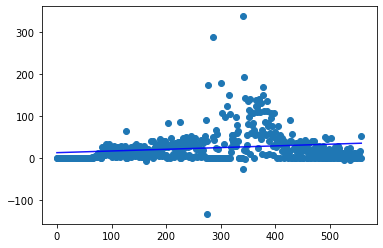

In [80]:
# Polynomial
plt.scatter(nc_new_deaths.days_since, nc_new_deaths.new_deaths)
x = pd.DataFrame({'days_since': np.linspace(nc_new_deaths.days_since.min(), nc_new_deaths.days_since.max(), 558)})


plt.plot(nc_new_deaths.days_since, lm_deaths.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm_deaths.rsquared, alpha=0.9)

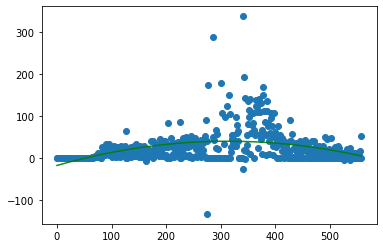

In [81]:
# Linear model
# Code borrowed from Stage IV Team Task
plt.scatter(nc_new_deaths.days_since, nc_new_deaths.new_deaths)

lm_deaths_poly_2 = smf.ols(formula='new_deaths ~ 1 + nc_new_deaths.days_since + I(nc_new_deaths.days_since ** 2.0)', 
                    data=nc_new_deaths).fit()
plt.plot(nc_new_deaths.days_since, lm_deaths_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % 
         lm_deaths_poly_2.rsquared, alpha=0.9)

In [82]:
lm_deaths_poly_2.params

Intercept                            -17.027005
nc_new_deaths.days_since               0.367648
I(nc_new_deaths.days_since ** 2.0)    -0.000588
dtype: float64

In [83]:
lm_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     17.23
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           3.83e-05
Time:                        09:52:26   Log-Likelihood:                -2804.8
No. Observations:                 558   AIC:                             5614.
Df Residuals:                     556   BIC:                             5622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3074      3.124      4.260      0.000       7.172      19.443
x              0.0403      0.010      4.151      0.000       0.021       0.059
==============================================================================
Omnibus:                      397.737   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6748.167
Skew:                           2.946   Prob(JB):                         0.00
Kurtosis:                      18.986   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
lm_deaths_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     53.94
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           3.91e-22
Time:                        09:52:31   Log-Likelihood:                -2763.7
No. Observations:                 558   AIC:                             5533.
Df Residuals:                     555   BIC:                             5546.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -17.0270      4.347     -3.917      0.000     -25.566      -8.488
nc_new_deaths.days_since               0.3676      0.036     10.198      0.000       0.297       0.438
I(nc_new_deaths.days_since ** 2.0)    -0.0006   6.27e-05     -9.379      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      384.772   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7827.528
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      20.518   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

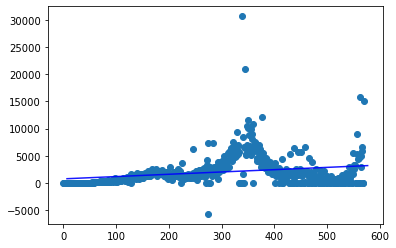

In [86]:
plt.scatter(nc_new_cases.days_since, nc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(nc_new_cases.days_since.min(), nc_new_cases.days_since.max(), 571)})


plt.plot(nc_new_cases.days_since + 7, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9, scalex=False)

Now we graph the projected forecast for North Carolina (next 7 days)

References
- Stage IV Team Code
- Notes from class
- https://www.askpython.com/python/examples/python-predict-function#:~:text=Python%20predict()%20function%20enables,basis%20of%20the%20trained%20model.&text=The%20predict()%20function%20accepts,the%20data%20to%20be%20tested. 

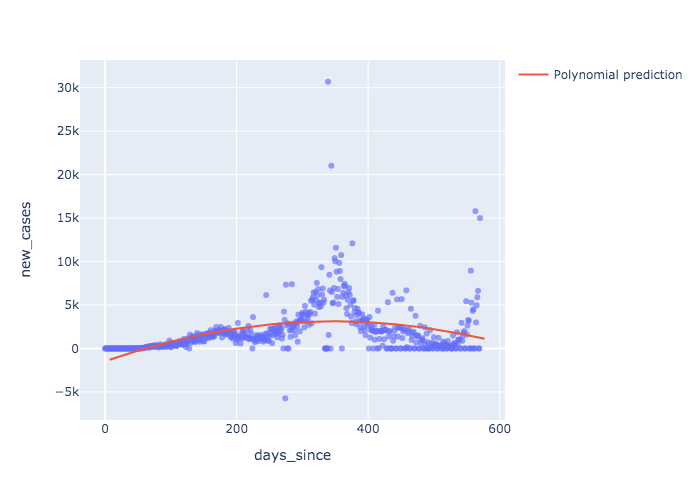

In [87]:
# Borrowed from Stage IV Team Task
x = pd.DataFrame({'days_since': np.linspace(nc_new_cases.days_since.min(), nc_new_cases.days_since.max(), 571)})
fig = px.scatter(nc_new_cases, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = nc_new_cases.days_since + 7, y = lm_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

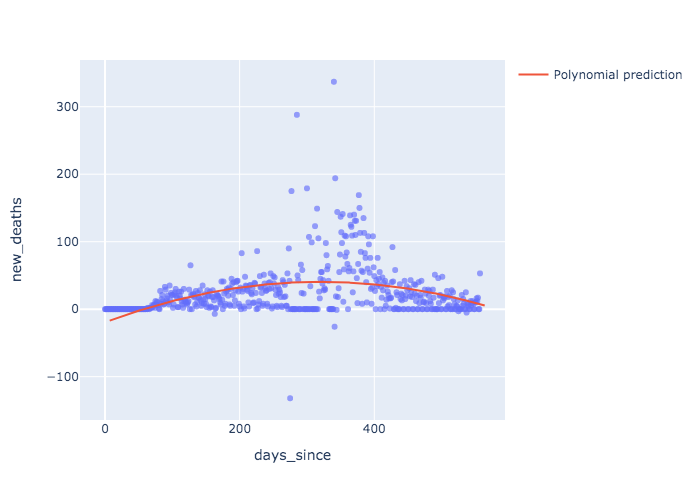

In [88]:
# Borrowed from Stage IV Team Task
x = pd.DataFrame({'days_since': np.linspace(nc_new_deaths.days_since.min(), nc_new_deaths.days_since.max(), 558)})
fig = px.scatter(nc_new_deaths, x='days_since', y='new_deaths', opacity=0.65)
fig.add_trace(go.Scatter(x = nc_new_deaths.days_since + 7, y = lm_deaths_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

#### Analysis

Looking at the two graphs above we can see that covid trends for the state of North Carolina will see a very slight rise and then continue to dip down throughout the next 7 days. We can also note that the prediction line seems to remain steady throughout the graph. Both graphs also seem to have moderately-high variance.

#### County Models

Now we choose 5 counties (North Carolina) who are at the highest risk and have the highest amount of cases and generate models for each county. Per google research, the top 5 counties in North Carolina that have the highest amount of cases are: Wake, Mecklenburg, Guilford, Forsyth and Cumberland. Since we are just generating models I am reusing logic and code from the state models as well as reusing some of my old member task code.

In [18]:
# Using own code from Stage II member task
# Wake County 
wc_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
wc_cases = wc_cases.drop(wc_cases.index[wc_cases['countyFIPS'] != 37183])

wc_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
wc_deaths = wc_deaths.drop(wc_deaths.index[wc_deaths['countyFIPS'] != 37183])

wc_cases_cropped = wc_cases.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)
wc_deaths_cropped = wc_deaths.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)

wc_cases_total = wc_cases_cropped.sum()
wc_deaths_total = wc_deaths_cropped.sum()

new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = wc_cases_cropped.iloc[:,column] - wc_cases_cropped.iloc[:,column-1] 

wc_new_cases = new_cases.sum()
wc_new_cases = wc_new_cases.to_frame()
wc_new_cases = wc_new_cases.drop([1]) 

wc_new_cases = wc_new_cases.reset_index()
wc_new_cases = wc_new_cases.rename(columns={"index": "days_since", 0 : "new_cases"})
wc_new_cases['days_since'] = wc_new_cases['days_since'].apply(lambda x: x-2)
wc_new_cases

new_deaths = pd.DataFrame()

for column in range(1,559):
  new_deaths[column] = wc_deaths_cropped.iloc[:,column] - wc_deaths_cropped.iloc[:,column-1]

wc_new_deaths = new_deaths.sum()
wc_new_deaths = wc_new_deaths.to_frame()

wc_new_deaths = wc_new_deaths.reset_index()
wc_new_deaths = wc_new_deaths.rename(columns={"index": "days_since", 0 : "new_deaths"})
wc_new_deaths['days_since'] = wc_new_deaths['days_since'].apply(lambda x: x-1)
wc_new_deaths

x = wc_new_cases['days_since']
y = wc_new_cases['new_cases']

lm = smf.ols(formula= 'y ~ x', data = wc_new_cases).fit()

lm.params

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/2333799713.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = wc_cases_cropped.iloc[:,column] - wc_cases_cropped.iloc[:,column-1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/2333799713.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = wc_deaths_cropped.iloc[:,column] - wc_deaths_cropped.iloc[:,column-1]


Intercept    54.936738
x             0.423180
dtype: float64

In [19]:
# Using own code from Stage II member task
# Mecklenburg County 
mc_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
mc_cases = mc_cases.drop(mc_cases.index[mc_cases['countyFIPS'] != 37119])

mc_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
mc_deaths = mc_deaths.drop(mc_deaths.index[mc_deaths['countyFIPS'] != 37119])

mc_cases_cropped = mc_cases.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)
mc_deaths_cropped = mc_deaths.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)

mc_cases_total = mc_cases_cropped.sum()
mc_deaths_total = mc_deaths_cropped.sum()

new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = mc_cases_cropped.iloc[:,column] - mc_cases_cropped.iloc[:,column-1] 

mc_new_cases = new_cases.sum()
mc_new_cases = mc_new_cases.to_frame()
mc_new_cases = mc_new_cases.drop([1]) 

mc_new_cases = mc_new_cases.reset_index()
mc_new_cases = mc_new_cases.rename(columns={"index": "days_since", 0 : "new_cases"})
mc_new_cases['days_since'] = mc_new_cases['days_since'].apply(lambda x: x-2)
mc_new_cases

new_deaths = pd.DataFrame()

for column in range(1,559):
  new_deaths[column] = mc_deaths_cropped.iloc[:,column] - mc_deaths_cropped.iloc[:,column-1]

mc_new_deaths = new_deaths.sum()
mc_new_deaths = mc_new_deaths.to_frame()

mc_new_deaths = mc_new_deaths.reset_index()
mc_new_deaths = mc_new_deaths.rename(columns={"index": "days_since", 0 : "new_deaths"})
mc_new_deaths['days_since'] = mc_new_deaths['days_since'].apply(lambda x: x-1)
mc_new_deaths

x = mc_new_cases['days_since']
y = mc_new_cases['new_cases']

lm = smf.ols(formula= 'y ~ x', data = mc_new_cases).fit()

lm.params

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/1746474396.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = mc_cases_cropped.iloc[:,column] - mc_cases_cropped.iloc[:,column-1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/1746474396.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = mc_deaths_cropped.iloc[:,column] - mc_deaths_cropped.iloc[:,column-1]


Intercept    100.801789
x              0.430456
dtype: float64

In [28]:
# Using own code from Stage II member task
# Guilford County 
gc_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
gc_cases = gc_cases.drop(gc_cases.index[gc_cases['countyFIPS'] != 37081])

gc_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
gc_deaths = gc_deaths.drop(gc_deaths.index[gc_deaths['countyFIPS'] != 37081])

gc_cases_cropped = gc_cases.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)
gc_deaths_cropped = gc_deaths.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)

gc_cases_total = gc_cases_cropped.sum()
gc_deaths_total = gc_deaths_cropped.sum()

new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = gc_cases_cropped.iloc[:,column] - gc_cases_cropped.iloc[:,column-1] 

gc_new_cases = new_cases.sum()
gc_new_cases = gc_new_cases.to_frame()
gc_new_cases = gc_new_cases.drop([1]) 

gc_new_cases = gc_new_cases.reset_index()
gc_new_cases = gc_new_cases.rename(columns={"index": "days_since", 0 : "new_cases"})
gc_new_cases['days_since'] = gc_new_cases['days_since'].apply(lambda x: x-2)
gc_new_cases

new_deaths = pd.DataFrame()

for column in range(1,559):
  new_deaths[column] = gc_deaths_cropped.iloc[:,column] - gc_deaths_cropped.iloc[:,column-1]

gc_new_deaths = new_deaths.sum()
gc_new_deaths = gc_new_deaths.to_frame()

gc_new_deaths = gc_new_deaths.reset_index()
gc_new_deaths = gc_new_deaths.rename(columns={"index": "days_since", 0 : "new_deaths"})
gc_new_deaths['days_since'] = gc_new_deaths['days_since'].apply(lambda x: x-1)
gc_new_deaths

x = gc_new_cases['days_since']
y = gc_new_cases['new_cases']

lm = smf.ols(formula= 'y ~ x', data = gc_new_cases).fit()

lm.params

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/3042336768.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = gc_cases_cropped.iloc[:,column] - gc_cases_cropped.iloc[:,column-1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/3042336768.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = gc_deaths_cropped.iloc[:,column] - gc_deaths_cropped.iloc[:,column-1]


Intercept    34.723537
x             0.201019
dtype: float64

In [33]:
# Using own code from Stage II member task
# Forsyth County 
fc_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
fc_cases = fc_cases.drop(fc_cases.index[fc_cases['countyFIPS'] != 37067])

fc_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
fc_deaths = fc_deaths.drop(fc_deaths.index[fc_deaths['countyFIPS'] != 37067])

fc_cases_cropped = fc_cases.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)
fc_deaths_cropped = fc_deaths.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)

fc_cases_total = fc_cases_cropped.sum()
fc_deaths_total = fc_deaths_cropped.sum()

new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = fc_cases_cropped.iloc[:,column] - fc_cases_cropped.iloc[:,column-1] 

fc_new_cases = new_cases.sum()
fc_new_cases = fc_new_cases.to_frame()
fc_new_cases = fc_new_cases.drop([1]) 

fc_new_cases = fc_new_cases.reset_index()
fc_new_cases = fc_new_cases.rename(columns={"index": "days_since", 0 : "new_cases"})
fc_new_cases['days_since'] = fc_new_cases['days_since'].apply(lambda x: x-2)
fc_new_cases

new_deaths = pd.DataFrame()

for column in range(1,559):
  new_deaths[column] = fc_deaths_cropped.iloc[:,column] - fc_deaths_cropped.iloc[:,column-1]

fc_new_deaths = new_deaths.sum()
fc_new_deaths = fc_new_deaths.to_frame()

fc_new_deaths = fc_new_deaths.reset_index()
fc_new_deaths = fc_new_deaths.rename(columns={"index": "days_since", 0 : "new_deaths"})
fc_new_deaths['days_since'] = fc_new_deaths['days_since'].apply(lambda x: x-1)
fc_new_deaths

x = fc_new_cases['days_since']
y = fc_new_cases['new_cases']

lm = smf.ols(formula= 'y ~ x', data = fc_new_cases).fit()

lm.params

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/2465822423.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = fc_cases_cropped.iloc[:,column] - fc_cases_cropped.iloc[:,column-1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/2465822423.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = fc_deaths_cropped.iloc[:,column] - fc_deaths_cropped.iloc[:,column-1]


Intercept    31.014764
x             0.137687
dtype: float64

In [32]:
# Using own code from Stage II member task
# Cumberland County 
cc_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cc_cases = cc_cases.drop(cc_cases.index[cc_cases['countyFIPS'] != 37051])

cc_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
cc_deaths = cc_deaths.drop(cc_deaths.index[cc_deaths['countyFIPS'] != 37051])

cc_cases_cropped = cc_cases.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)
cc_deaths_cropped = cc_deaths.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], axis=1)

cc_cases_total = cc_cases_cropped.sum()
cc_deaths_total = cc_deaths_cropped.sum()

new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = cc_cases_cropped.iloc[:,column] - cc_cases_cropped.iloc[:,column-1] 

cc_new_cases = new_cases.sum()
cc_new_cases = cc_new_cases.to_frame()
cc_new_cases = cc_new_cases.drop([1]) 

cc_new_cases = cc_new_cases.reset_index()
cc_new_cases = cc_new_cases.rename(columns={"index": "days_since", 0 : "new_cases"})
cc_new_cases['days_since'] = cc_new_cases['days_since'].apply(lambda x: x-2)
cc_new_cases

new_deaths = pd.DataFrame()

for column in range(1,559):
  new_deaths[column] = cc_deaths_cropped.iloc[:,column] - cc_deaths_cropped.iloc[:,column-1]

cc_new_deaths = new_deaths.sum()
cc_new_deaths = cc_new_deaths.to_frame()

cc_new_deaths = cc_new_deaths.reset_index()
cc_new_deaths = cc_new_deaths.rename(columns={"index": "days_since", 0 : "new_deaths"})
cc_new_deaths['days_since'] = cc_new_deaths['days_since'].apply(lambda x: x-1)
cc_new_deaths

x = cc_new_cases['days_since']
y = cc_new_cases['new_cases']

lm = smf.ols(formula= 'y ~ x', data = cc_new_cases).fit()

lm.params

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/2356164508.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = cc_cases_cropped.iloc[:,column] - cc_cases_cropped.iloc[:,column-1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/2356164508.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = cc_deaths_cropped.iloc[:,column] - cc_deaths_cropped.iloc[:,column-1]


Intercept    10.079599
x             0.179166
dtype: float64

### Wake County

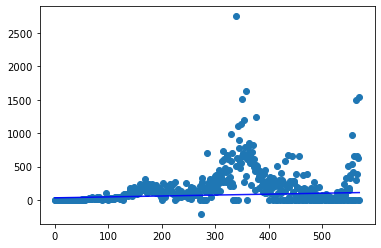

In [36]:
plt.scatter(wc_new_cases.days_since, wc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(wc_new_cases.days_since.min(), wc_new_cases.days_since.max(), 571)})


plt.plot(wc_new_cases.days_since, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9)

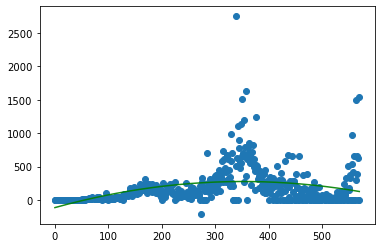

In [40]:
plt.scatter(wc_new_cases.days_since, wc_new_cases.new_cases)

lm_poly_2 = smf.ols(formula='new_cases ~ 1 + wc_new_cases.days_since + I(wc_new_cases.days_since ** 2.0)', 
                    data=wc_new_cases).fit()
plt.plot(wc_new_cases.days_since, lm_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % lm_poly_2.rsquared, alpha=0.9)

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.68e-08
Time:                        20:05:43   Log-Likelihood:                -3416.3
No. Observations:                 571   AIC:                             6837.
Df Residuals:                     569   BIC:                             6845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0148      8.037      3.859      0.000      15.229      46.800
x              0.1377      0.024      5.640      0.000       0.090       0.186
==============================================================================
Omnibus:                      503.378   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21649.595
Skew:                           3.644   Prob(JB):                         0.00
Kurtosis:                      32.272   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
lm_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     53.30
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           6.12e-22
Time:                        20:05:46   Log-Likelihood:                -3937.5
No. Observations:                 571   AIC:                             7881.
Df Residuals:                     568   BIC:                             7894.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -115.3547     29.989     -3.847      0.000    -174.258     -56.451
wc_new_cases.days_since               2.2189      0.243      9.130      0.000       1.742       2.696
I(wc_new_cases.days_since ** 2.0)    -0.0032      0.000     -7.632      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      520.146   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18685.542
Skew:                           3.930   Prob(JB):                         0.00
Kurtosis:                      29.900   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
x = wc_new_deaths['days_since']
y = wc_new_deaths['new_deaths']

lm_deaths = smf.ols(formula= 'y ~ x', data = wc_new_deaths).fit()

lm_deaths.params

Intercept    0.731766
x            0.002192
dtype: float64

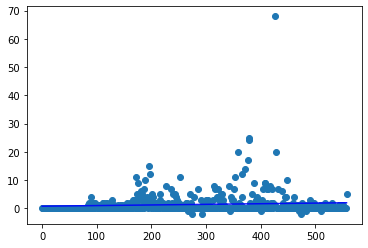

In [47]:
plt.scatter(wc_new_deaths.days_since, wc_new_deaths.new_deaths)
x = pd.DataFrame({'days_since': np.linspace(wc_new_deaths.days_since.min(), wc_new_deaths.days_since.max(), 558)})


plt.plot(wc_new_deaths.days_since, lm_deaths.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm_deaths.rsquared, alpha=0.9)

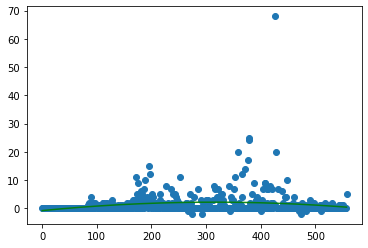

In [50]:
# Code borrowed from Stage IV Team Task
plt.scatter(wc_new_deaths.days_since, wc_new_deaths.new_deaths)

lm_deaths_poly_2 = smf.ols(formula='new_deaths ~ 1 + wc_new_deaths.days_since + I(wc_new_deaths.days_since ** 2.0)', 
                    data=wc_new_deaths).fit()
plt.plot(wc_new_deaths.days_since, lm_deaths_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % 
         lm_deaths_poly_2.rsquared, alpha=0.9)

In [62]:
lm_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.188
Date:                Sat, 16 Apr 2022   Prob (F-statistic):             0.0412
Time:                        20:09:11   Log-Likelihood:                -1574.8
No. Observations:                 558   AIC:                             3154.
Df Residuals:                     556   BIC:                             3162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7318      0.345      2.123      0.034       0.055       1.409
x              0.0022      0.001      2.046      0.041     8.8e-05       0.004
==============================================================================
Omnibus:                      897.658   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           401705.736
Skew:                           9.251   Prob(JB):                         0.00
Kurtosis:                     133.136   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
lm_deaths_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     10.58
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           3.10e-05
Time:                        20:09:14   Log-Likelihood:                -1566.5
No. Observations:                 558   AIC:                             3139.
Df Residuals:                     555   BIC:                             3152.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.8216      0.509     -1.615      0.107      -1.821       0.178
wc_new_deaths.days_since               0.0190      0.004      4.494      0.000       0.011       0.027
I(wc_new_deaths.days_since ** 2.0) -3.009e-05   7.33e-06     -4.105      0.000   -4.45e-05   -1.57e-05
==============================================================================
Omnibus:                      909.737   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           442911.995
Skew:                           9.473   Prob(JB):                         0.00
Kurtosis:                     139.715   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

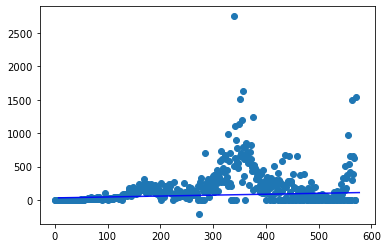

In [52]:
plt.scatter(wc_new_cases.days_since, wc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(wc_new_cases.days_since.min(), wc_new_cases.days_since.max(), 571)})


plt.plot(wc_new_cases.days_since + 7, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9, scalex=False)

### Prediction Path (forecast)

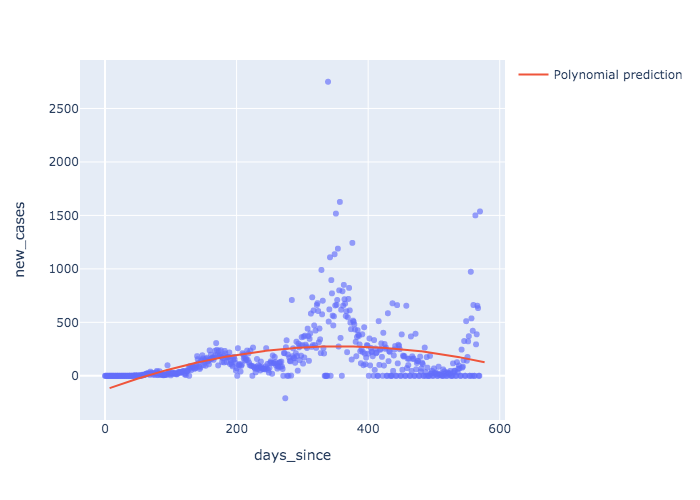

In [54]:
# Borrowed from Stage IV Team Task 
x = pd.DataFrame({'days_since': np.linspace(wc_new_cases.days_since.min(), wc_new_cases.days_since.max(), 571)})
fig = px.scatter(wc_new_cases, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = wc_new_cases.days_since + 7, y = lm_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

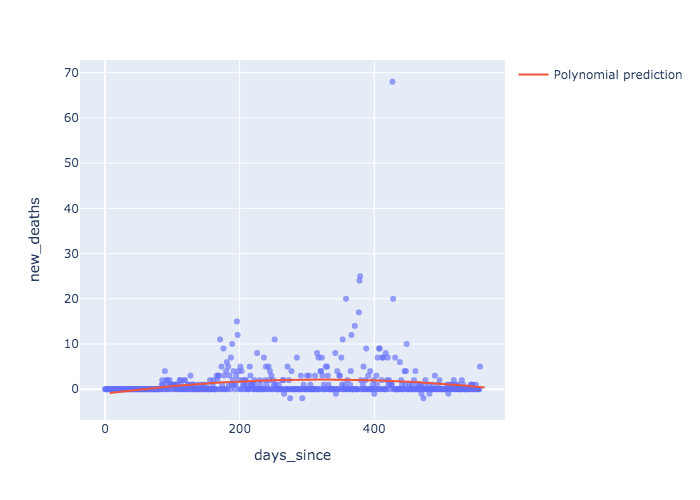

In [56]:
# Borrowed from Stage IV Team Task
x = pd.DataFrame({'days_since': np.linspace(wc_new_deaths.days_since.min(), wc_new_deaths.days_since.max(), 558)})
fig = px.scatter(wc_new_deaths, x='days_since', y='new_deaths', opacity=0.65)
fig.add_trace(go.Scatter(x = wc_new_deaths.days_since + 7, y = lm_deaths_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Trends
- It seems as if the trends of Wake County very much follow similarily follow the trends of North Carolina and even the entire United States.
- Wake County has some of the most populated cities in NC which could potentially be the driving entity of what is resembling some of the trends in the state of North Carolina.
- Cases for Wake County seem to be high, which makes sense as it is one of the more populated counties of NC. There seems to be peaks that reflect surges in the US while deaths seem to overall maintain low while there is a slight increase during surges. Perhaps these are during times of gathering/holidays?

### Mecklenburg County

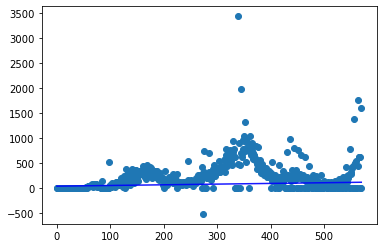

In [64]:
plt.scatter(mc_new_cases.days_since, mc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(mc_new_cases.days_since.min(), mc_new_cases.days_since.max(), 571)})


plt.plot(mc_new_cases.days_since, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9)

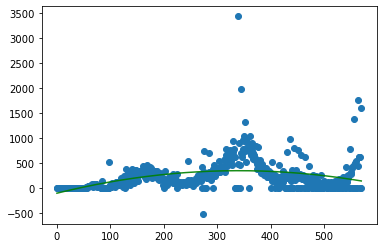

In [65]:
plt.scatter(mc_new_cases.days_since, mc_new_cases.new_cases)

lm_poly_2 = smf.ols(formula='new_cases ~ 1 + mc_new_cases.days_since + I(mc_new_cases.days_since ** 2.0)', 
                    data=mc_new_cases).fit()
plt.plot(mc_new_cases.days_since, lm_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % lm_poly_2.rsquared, alpha=0.9)

In [67]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.68e-08
Time:                        20:10:35   Log-Likelihood:                -3416.3
No. Observations:                 571   AIC:                             6837.
Df Residuals:                     569   BIC:                             6845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0148      8.037      3.859      0.000      15.229      46.800
x              0.1377      0.024      5.640      0.000       0.090       0.186
==============================================================================
Omnibus:                      503.378   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21649.595
Skew:                           3.644   Prob(JB):                         0.00
Kurtosis:                      32.272   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
lm_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     54.20
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.88e-22
Time:                        20:10:43   Log-Likelihood:                -4008.8
No. Observations:                 571   AIC:                             8024.
Df Residuals:                     568   BIC:                             8037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -109.8291     33.977     -3.232      0.001    -176.566     -43.092
mc_new_cases.days_since               2.6515      0.275      9.629      0.000       2.111       3.192
I(mc_new_cases.days_since ** 2.0)    -0.0039      0.000     -8.332      0.000      -0.005      -0.003
==============================================================================
Omnibus:                      553.018   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30991.904
Skew:                           4.144   Prob(JB):                         0.00
Kurtosis:                      38.127   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
x = mc_new_deaths['days_since']
y = mc_new_deaths['new_deaths']

lm_deaths = smf.ols(formula= 'y ~ x', data = mc_new_deaths).fit()

lm_deaths.params

Intercept    1.414911
x            0.001309
dtype: float64

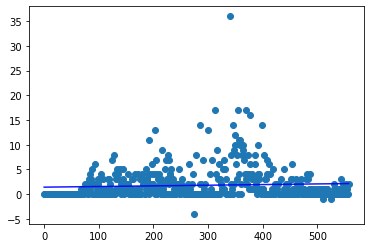

In [71]:
plt.scatter(mc_new_deaths.days_since, mc_new_deaths.new_deaths)
x = pd.DataFrame({'days_since': np.linspace(mc_new_deaths.days_since.min(), mc_new_deaths.days_since.max(), 558)})


plt.plot(mc_new_deaths.days_since, lm_deaths.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm_deaths.rsquared, alpha=0.9)

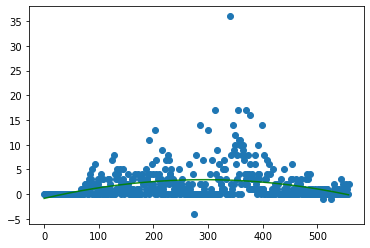

In [72]:
# Code borrowed from Stage IV Team Task
plt.scatter(mc_new_deaths.days_since, mc_new_deaths.new_deaths)

lm_deaths_poly_2 = smf.ols(formula='new_deaths ~ 1 + mc_new_deaths.days_since + I(mc_new_deaths.days_since ** 2.0)', 
                    data=mc_new_deaths).fit()
plt.plot(mc_new_deaths.days_since, lm_deaths_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % 
         lm_deaths_poly_2.rsquared, alpha=0.9)

In [73]:
lm_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.434
Date:                Sat, 16 Apr 2022   Prob (F-statistic):              0.119
Time:                        20:16:02   Log-Likelihood:                -1438.6
No. Observations:                 558   AIC:                             2881.
Df Residuals:                     556   BIC:                             2890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4149      0.270      5.241      0.000       0.885       1.945
x              0.0013      0.001      1.560      0.119      -0.000       0.003
==============================================================================
Omnibus:                      511.672   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18725.950
Skew:                           3.953   Prob(JB):                         0.00
Kurtosis:                      30.257   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lm_deaths_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     33.10
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.62e-14
Time:                        20:16:07   Log-Likelihood:                -1408.4
No. Observations:                 558   AIC:                             2823.
Df Residuals:                     555   BIC:                             2836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.8565      0.383     -2.236      0.026      -1.609      -0.104
mc_new_deaths.days_since               0.0258      0.003      8.127      0.000       0.020       0.032
I(mc_new_deaths.days_since ** 2.0) -4.401e-05   5.52e-06     -7.968      0.000   -5.49e-05   -3.32e-05
==============================================================================
Omnibus:                      510.747   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21361.637
Skew:                           3.880   Prob(JB):                         0.00
Kurtosis:                      32.301   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction Path (forecast)

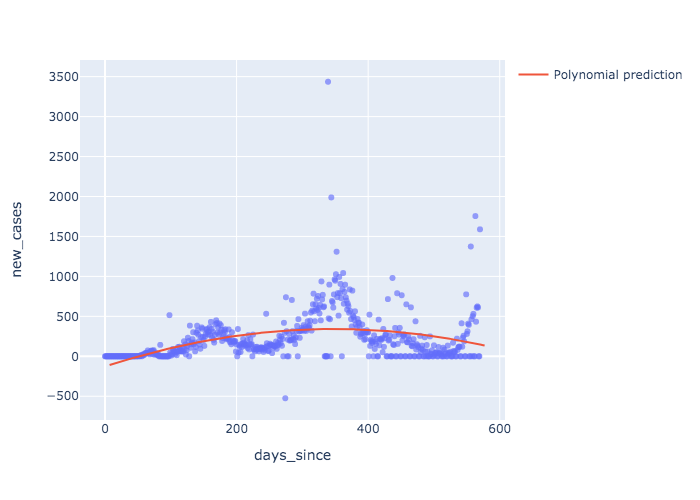

In [75]:
x = pd.DataFrame({'days_since': np.linspace(mc_new_cases.days_since.min(), mc_new_cases.days_since.max(), 571)})
fig = px.scatter(mc_new_cases, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = mc_new_cases.days_since + 7, y = lm_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

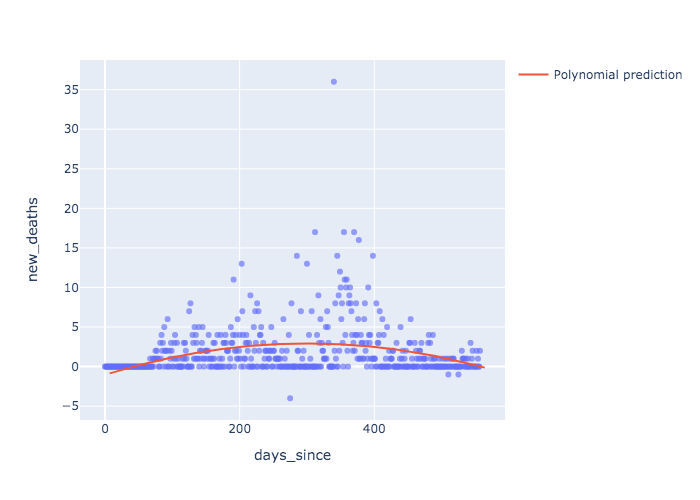

In [77]:
# Borrowed from Stage IV Team Task
x = pd.DataFrame({'days_since': np.linspace(mc_new_deaths.days_since.min(), mc_new_deaths.days_since.max(), 558)})
fig = px.scatter(mc_new_deaths, x='days_since', y='new_deaths', opacity=0.65)
fig.add_trace(go.Scatter(x = mc_new_deaths.days_since + 7, y = lm_deaths_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Trends 
- As the most populated county in North Carolina, it would make sense why Mecklenburg County has the trends it does.
- The cases for Mecklenburg County seem be consistent when compared to trends of NC and the United States as a whole.
- Cases in Mecklenburg seem to lean more on the high side throughout the entire pandemic while deaths remained more on the low side except seeing slight rises during surges. Interestingly enough though the trends for Mecklenburg county are high but are not higher than Wake County even though Mecklenburg County is the most populated county in NC.

### Guilford County

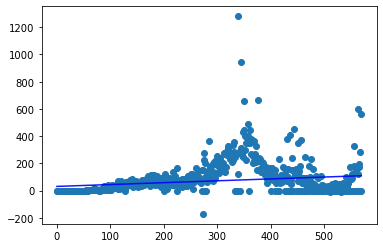

In [78]:
plt.scatter(gc_new_cases.days_since, gc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(gc_new_cases.days_since.min(), gc_new_cases.days_since.max(), 571)})


plt.plot(gc_new_cases.days_since, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9)

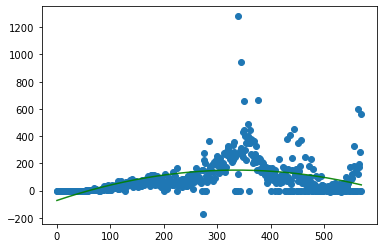

In [79]:
plt.scatter(gc_new_cases.days_since, gc_new_cases.new_cases)

lm_poly_2 = smf.ols(formula='new_cases ~ 1 + gc_new_cases.days_since + I(gc_new_cases.days_since ** 2.0)', 
                    data=gc_new_cases).fit()
plt.plot(gc_new_cases.days_since, lm_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % lm_poly_2.rsquared, alpha=0.9)

In [80]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.68e-08
Time:                        23:38:17   Log-Likelihood:                -3416.3
No. Observations:                 571   AIC:                             6837.
Df Residuals:                     569   BIC:                             6845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0148      8.037      3.859      0.000      15.229      46.800
x              0.1377      0.024      5.640      0.000       0.090       0.186
==============================================================================
Omnibus:                      503.378   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21649.595
Skew:                           3.644   Prob(JB):                         0.00
Kurtosis:                      32.272   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
lm_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     79.25
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.40e-31
Time:                        23:38:23   Log-Likelihood:                -3496.7
No. Observations:                 571   AIC:                             6999.
Df Residuals:                     568   BIC:                             7013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -72.1595     13.860     -5.206      0.000     -99.383     -44.936
gc_new_cases.days_since               1.3281      0.112     11.824      0.000       1.107       1.549
I(gc_new_cases.days_since ** 2.0)    -0.0020      0.000    -10.364      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      496.154   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17370.646
Skew:                           3.647   Prob(JB):                         0.00
Kurtosis:                      29.017   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
x = gc_new_deaths['days_since']
y = gc_new_deaths['new_deaths']

lm_deaths = smf.ols(formula= 'y ~ x', data = gc_new_deaths).fit()

lm_deaths.params

Intercept    0.629395
x            0.002463
dtype: float64

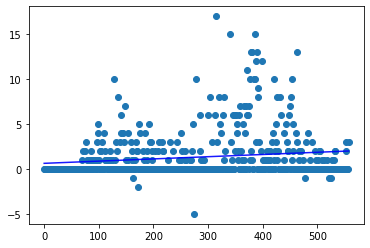

In [85]:
plt.scatter(gc_new_deaths.days_since, gc_new_deaths.new_deaths)
x = pd.DataFrame({'days_since': np.linspace(gc_new_deaths.days_since.min(), gc_new_deaths.days_since.max(), 558)})


plt.plot(gc_new_deaths.days_since, lm_deaths.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm_deaths.rsquared, alpha=0.9)

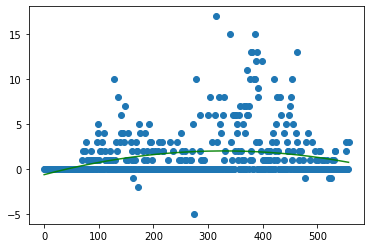

In [86]:
# Code borrowed from Stage IV Team Task
plt.scatter(gc_new_deaths.days_since, gc_new_deaths.new_deaths)

lm_deaths_poly_2 = smf.ols(formula='new_deaths ~ 1 + gc_new_deaths.days_since + I(gc_new_deaths.days_since ** 2.0)', 
                    data=gc_new_deaths).fit()
plt.plot(gc_new_deaths.days_since, lm_deaths_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % 
         lm_deaths_poly_2.rsquared, alpha=0.9)

In [87]:
lm_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     12.72
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           0.000393
Time:                        23:50:48   Log-Likelihood:                -1330.0
No. Observations:                 558   AIC:                             2664.
Df Residuals:                     556   BIC:                             2673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6294      0.222      2.832      0.005       0.193       1.066
x              0.0025      0.001      3.566      0.000       0.001       0.004
==============================================================================
Omnibus:                      328.136   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2201.757
Skew:                           2.630   Prob(JB):                         0.00
Kurtosis:                      11.187   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
lm_deaths_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     20.18
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           3.47e-09
Time:                        23:50:54   Log-Likelihood:                -1316.7
No. Observations:                 558   AIC:                             2639.
Df Residuals:                     555   BIC:                             2652.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.6283      0.325     -1.933      0.054      -1.267       0.010
gc_new_deaths.days_since               0.0160      0.003      5.948      0.000       0.011       0.021
I(gc_new_deaths.days_since ** 2.0) -2.437e-05   4.69e-06     -5.200      0.000   -3.36e-05   -1.52e-05
==============================================================================
Omnibus:                      312.643   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2001.880
Skew:                           2.489   Prob(JB):                         0.00
Kurtosis:                      10.831   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction Path (forecast)

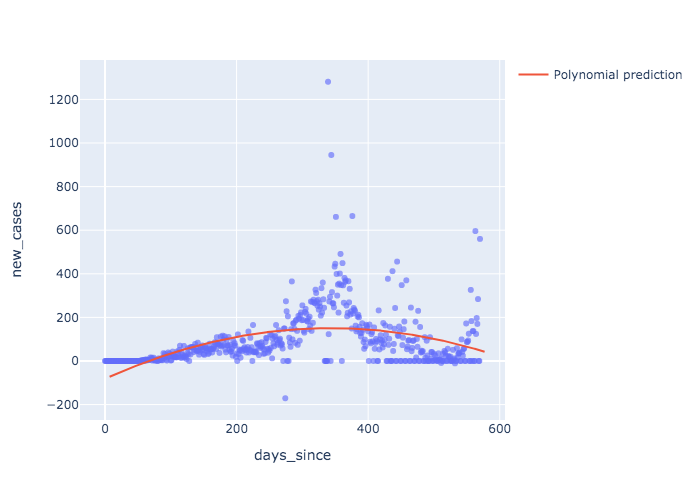

In [89]:
x = pd.DataFrame({'days_since': np.linspace(gc_new_cases.days_since.min(), gc_new_cases.days_since.max(), 571)})
fig = px.scatter(gc_new_cases, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = gc_new_cases.days_since + 7, y = lm_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

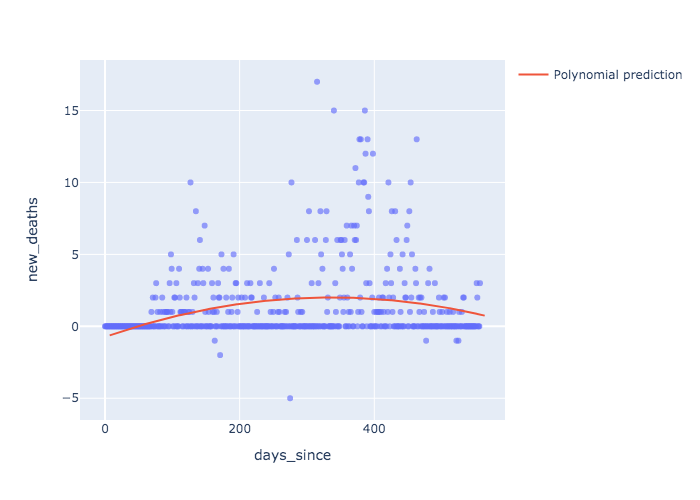

In [90]:
# Borrowed from Stage IV Team Task
x = pd.DataFrame({'days_since': np.linspace(gc_new_deaths.days_since.min(), gc_new_deaths.days_since.max(), 558)})
fig = px.scatter(gc_new_deaths, x='days_since', y='new_deaths', opacity=0.65)
fig.add_trace(go.Scatter(x = gc_new_deaths.days_since + 7, y = lm_deaths_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Trends
- For Guilford County, it seems like the overall trends are also somewhat similar to those of Wake and Mecklenburg counties. We can see that there is a spike in cases and then after the surge cases fall back down and remain steady. 
- As for deaths in Guilford County, it also seems to remain low however, it is important to note that even though the deaths are low they remain consistent at their current level as compared to other counties they fall right after a surge. We can see from the trend that they fall only a little bit just to go back up but these numbers are still low.

### Forsyth County

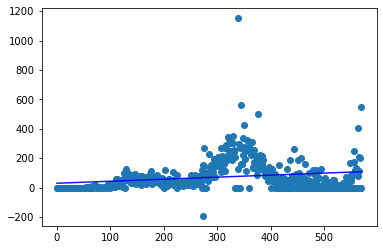

In [91]:
plt.scatter(fc_new_cases.days_since, fc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(fc_new_cases.days_since.min(), fc_new_cases.days_since.max(), 571)})


plt.plot(fc_new_cases.days_since, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9)

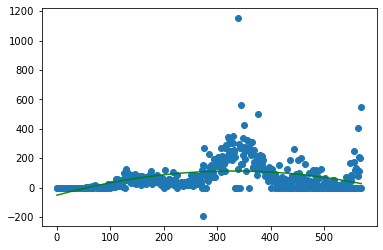

In [92]:
plt.scatter(fc_new_cases.days_since, fc_new_cases.new_cases)

lm_poly_2 = smf.ols(formula='new_cases ~ 1 + fc_new_cases.days_since + I(fc_new_cases.days_since ** 2.0)', 
                    data=fc_new_cases).fit()
plt.plot(fc_new_cases.days_since, lm_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % lm_poly_2.rsquared, alpha=0.9)

In [93]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           2.68e-08
Time:                        00:49:56   Log-Likelihood:                -3416.3
No. Observations:                 571   AIC:                             6837.
Df Residuals:                     569   BIC:                             6845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0148      8.037      3.859      0.000      15.229      46.800
x              0.1377      0.024      5.640      0.000       0.090       0.186
==============================================================================
Omnibus:                      503.378   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21649.595
Skew:                           3.644   Prob(JB):                         0.00
Kurtosis:                      32.272   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
lm_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     66.57
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.06e-26
Time:                        00:50:02   Log-Likelihood:                -3371.8
No. Observations:                 571   AIC:                             6750.
Df Residuals:                     568   BIC:                             6763.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -50.1712     11.135     -4.506      0.000     -72.042     -28.300
fc_new_cases.days_since               0.9938      0.090     11.013      0.000       0.817       1.171
I(fc_new_cases.days_since ** 2.0)    -0.0015      0.000     -9.799      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      547.369   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32271.078
Skew:                           4.050   Prob(JB):                         0.00
Kurtosis:                      38.928   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
x = fc_new_deaths['days_since']
y = fc_new_deaths['new_deaths']

lm_deaths = smf.ols(formula= 'y ~ x', data = fc_new_deaths).fit()

lm_deaths.params

Intercept    0.317887
x            0.001638
dtype: float64

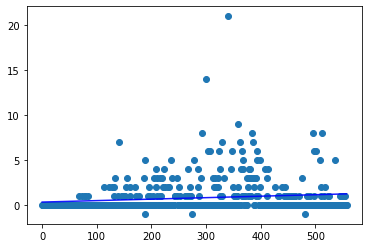

In [110]:
plt.scatter(fc_new_deaths.days_since, fc_new_deaths.new_deaths)
x = pd.DataFrame({'days_since': np.linspace(fc_new_deaths.days_since.min(), fc_new_deaths.days_since.max(), 558)})


plt.plot(fc_new_deaths.days_since, lm_deaths.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm_deaths.rsquared, alpha=0.9)

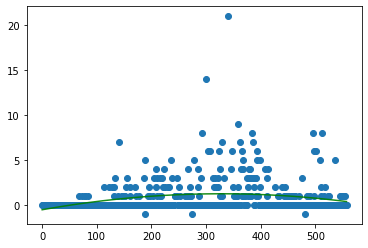

In [111]:
# Code borrowed from Stage IV Team Task
plt.scatter(fc_new_deaths.days_since, fc_new_deaths.new_deaths)

lm_deaths_poly_2 = smf.ols(formula='new_deaths ~ 1 + fc_new_deaths.days_since + I(fc_new_deaths.days_since ** 2.0)', 
                    data=fc_new_deaths).fit()
plt.plot(fc_new_deaths.days_since, lm_deaths_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % 
         lm_deaths_poly_2.rsquared, alpha=0.9)

In [112]:
lm_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     11.59
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           0.000711
Time:                        01:15:40   Log-Likelihood:                -1128.4
No. Observations:                 558   AIC:                             2261.
Df Residuals:                     556   BIC:                             2269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3179      0.155      2.053      0.041       0.014       0.622
x              0.0016      0.000      3.404      0.001       0.001       0.003
==============================================================================
Omnibus:                      561.572   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27020.929
Skew:                           4.487   Prob(JB):                         0.00
Kurtosis:                      35.888   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
lm_deaths_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.22e-08
Time:                        00:56:47   Log-Likelihood:                -1115.8
No. Observations:                 558   AIC:                             2238.
Df Residuals:                     555   BIC:                             2251.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.5352      0.227     -2.360      0.019      -0.981      -0.090
fc_new_deaths.days_since               0.0108      0.002      5.766      0.000       0.007       0.015
I(fc_new_deaths.days_since ** 2.0) -1.653e-05   3.27e-06     -5.056      0.000   -2.29e-05   -1.01e-05
==============================================================================
Omnibus:                      557.891   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27321.989
Skew:                           4.428   Prob(JB):                         0.00
Kurtosis:                      36.116   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction Path (forecast)

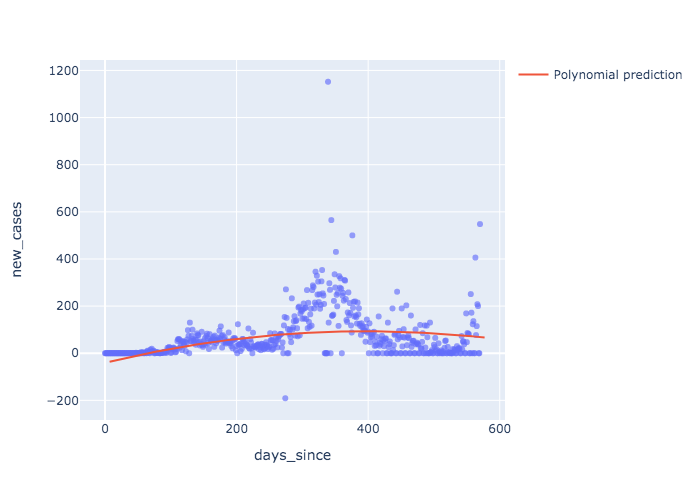

In [113]:
x = pd.DataFrame({'days_since': np.linspace(fc_new_cases.days_since.min(), fc_new_cases.days_since.max(), 571)})
fig = px.scatter(fc_new_cases, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = fc_new_cases.days_since + 7, y = lm_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

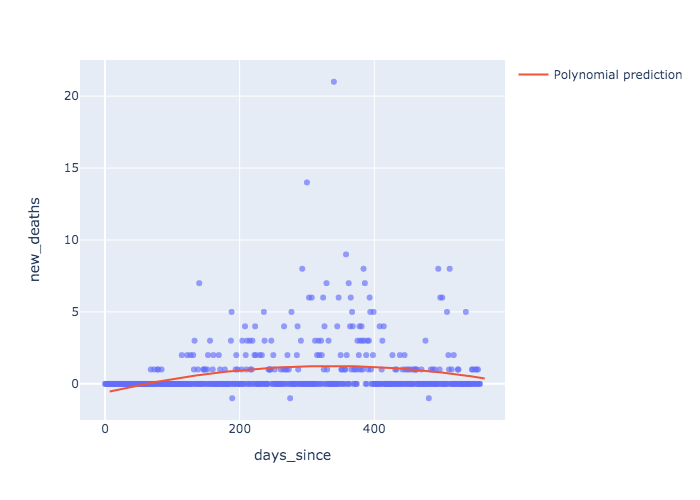

In [103]:
# Borrowed from Stage IV Team Task
x = pd.DataFrame({'days_since': np.linspace(fc_new_deaths.days_since.min(), fc_new_deaths.days_since.max(), 558)})
fig = px.scatter(fc_new_deaths, x='days_since', y='new_deaths', opacity=0.65)
fig.add_trace(go.Scatter(x = fc_new_deaths.days_since + 7, y = lm_deaths_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Trends
- The overall trends for Forsyth County show that cases/deaths are drastically lower than the other counties. A lot of this is simply due to the fact that are the other counties are more popular and perhaps in more urban settings as compared to Forsyth where a decent portion of the county is in a rural setting.
- Case/death trends for Forsyth County show that even during surges their trends are still somewhat steady. This shows that the trends for Forsyth remain relatively consistent. For cases, a lot of the data seems to be grouped together which shows the trends are steady and for deaths the data is more separated but still on the low side.

### Cumberland County

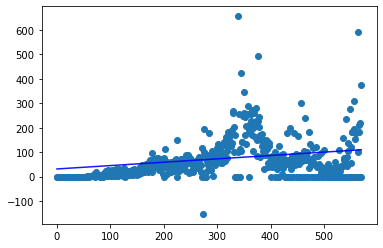

In [105]:
plt.scatter(cc_new_cases.days_since, cc_new_cases.new_cases)
x = pd.DataFrame({'days_since': np.linspace(cc_new_cases.days_since.min(), cc_new_cases.days_since.max(), 571)})


plt.plot(cc_new_cases.days_since, lm.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm.rsquared, alpha=0.9)

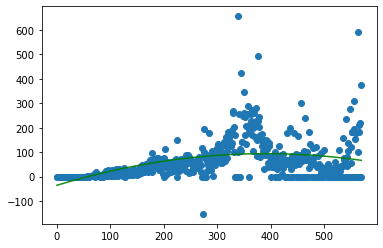

In [106]:
plt.scatter(cc_new_cases.days_since, cc_new_cases.new_cases)

lm_poly_2 = smf.ols(formula='new_cases ~ 1 + cc_new_cases.days_since + I(cc_new_cases.days_since ** 2.0)', 
                    data=cc_new_cases).fit()
plt.plot(cc_new_cases.days_since, lm_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % lm_poly_2.rsquared, alpha=0.9)

In [107]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           2.68e-08
Time:                        01:09:37   Log-Likelihood:                -3416.3
No. Observations:                 571   AIC:                             6837.
Df Residuals:                     569   BIC:                             6845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0148      8.037      3.859      0.000      15.229      46.800
x              0.1377      0.024      5.640      0.000       0.090       0.186
==============================================================================
Omnibus:                      503.378   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21649.595
Skew:                           3.644   Prob(JB):                         0.00
Kurtosis:                      32.272   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
lm_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     71.94
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.41e-28
Time:                        01:09:44   Log-Likelihood:                -3248.7
No. Observations:                 571   AIC:                             6503.
Df Residuals:                     568   BIC:                             6516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -35.7879      8.977     -3.987      0.000     -53.420     -18.156
cc_new_cases.days_since               0.6628      0.073      9.111      0.000       0.520       0.806
I(cc_new_cases.days_since ** 2.0)    -0.0008      0.000     -6.867      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      376.478   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5555.989
Skew:                           2.691   Prob(JB):                         0.00
Kurtosis:                      17.302   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
x = cc_new_deaths['days_since']
y = cc_new_deaths['new_deaths']

lm_deaths = smf.ols(formula= 'y ~ x', data = cc_new_deaths).fit()

lm_deaths.params

Intercept    0.253813
x            0.001251
dtype: float64

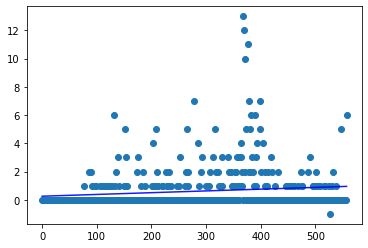

In [115]:
plt.scatter(cc_new_deaths.days_since, cc_new_deaths.new_deaths)
x = pd.DataFrame({'days_since': np.linspace(cc_new_deaths.days_since.min(), cc_new_deaths.days_since.max(), 558)})


plt.plot(cc_new_deaths.days_since, lm_deaths.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % lm_deaths.rsquared, alpha=0.9)

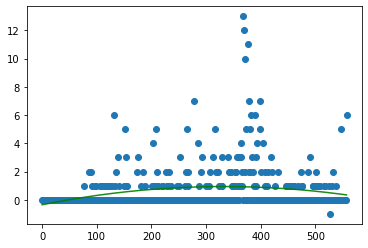

In [116]:
# Code borrowed from Stage IV Team Task
plt.scatter(cc_new_deaths.days_since, cc_new_deaths.new_deaths)

lm_deaths_poly_2 = smf.ols(formula='new_deaths ~ 1 + cc_new_deaths.days_since + I(cc_new_deaths.days_since ** 2.0)', 
                    data=cc_new_deaths).fit()
plt.plot(cc_new_deaths.days_since, lm_deaths_poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % 
         lm_deaths_poly_2.rsquared, alpha=0.9)

In [117]:
lm_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.30
Date:                Sun, 17 Apr 2022   Prob (F-statistic):            0.00141
Time:                        01:16:29   Log-Likelihood:                -1010.7
No. Observations:                 558   AIC:                             2025.
Df Residuals:                     556   BIC:                             2034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.125      2.024      0.043       0.007       0.500
x              0.0013      0.000      3.209      0.001       0.000       0.002
==============================================================================
Omnibus:                      515.794   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13872.120
Skew:                           4.156   Prob(JB):                         0.00
Kurtosis:                      25.969   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
lm_deaths_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     14.99
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           4.55e-07
Time:                        01:16:34   Log-Likelihood:                -1001.1
No. Observations:                 558   AIC:                             2008.
Df Residuals:                     555   BIC:                             2021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.3505      0.185     -1.898      0.058      -0.713       0.012
cc_new_deaths.days_since               0.0078      0.002      5.075      0.000       0.005       0.011
I(cc_new_deaths.days_since ** 2.0) -1.171e-05   2.66e-06     -4.399      0.000   -1.69e-05   -6.48e-06
==============================================================================
Omnibus:                      510.138   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13607.336
Skew:                           4.086   Prob(JB):                         0.00
Kurtosis:                      25.771   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction Path (forecast)

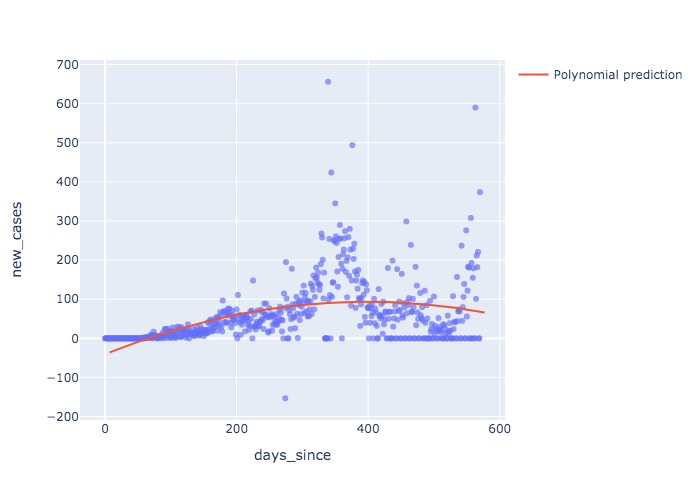

In [119]:
x = pd.DataFrame({'days_since': np.linspace(cc_new_cases.days_since.min(), cc_new_cases.days_since.max(), 571)})
fig = px.scatter(cc_new_cases, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = cc_new_cases.days_since + 7, y = lm_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

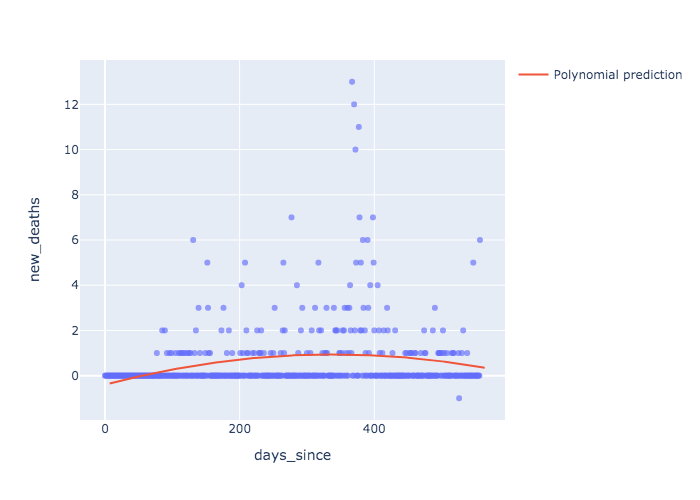

In [120]:
# Borrowed from Stage IV Team Task
x = pd.DataFrame({'days_since': np.linspace(cc_new_deaths.days_since.min(), cc_new_deaths.days_since.max(), 558)})
fig = px.scatter(cc_new_deaths, x='days_since', y='new_deaths', opacity=0.65)
fig.add_trace(go.Scatter(x = cc_new_deaths.days_since + 7, y = lm_deaths_poly_2.predict(x), name='Polynomial prediction'))
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Trends
- Trends for Cumberland County seem to be drastically lower than the trends for the other 5 counties.
- For example, Cumberland County sees relatively (when compared to other counties) low cases and deaths just by looking at the models. Another thing to note is that Cumberland County is more rural when compared to counties like Wake, Mecklenburg and Guilford.
- The trends for deaths in Cumberland also remain low and steady while seeing slight rises during surges. Hence why the prediction models for both cases and deaths also predict relatively low numbers.

### Utilizing hospital data to calculate the point of no return for North Carolina

In [287]:
hospital.head()

,OBJECTID,X,Y,hospital_pk,collection_week,state,ccn,hospital_name,address,city,...,prevadmit_5059_susp_7d_sum,prevadmit_6069_susp_7d_sum,prevadmit_7079_susp_7d_sum,prevadmit_80p_susp_7d_sum,prevadmit_susp_unk_7d_sum,prevadmit_pedi_susp_7d_sum,prevday_totED_visits_7d_sum,prevadmit_flu_conf_7d_sum,zip_code,last_updated
0,1,-90.128340,29.942875,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2022/02/04 00:00:00+00,LA,NaN,Crescent City Surgical Centre,0,0,...,0,0,0,0,0,0,0,0,70118,2022/02/14 20:08:00+00
1,4,-106.494180,31.769075,452193,2021/10/15 00:00:00+00,TX,452193.0,El Paso LTAC Hospital,1221 N Cotton St,El Paso,...,0,0,0,0,0,0,0,0,79902,2021/10/25 17:57:00+00
2,5,-91.154369,30.651214,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2022/02/04 00:00:00+00,LA,NaN,Surgery Center of Zachary,0,0,...,0,0,0,0,0,0,0,0,70791,2022/02/14 20:08:00+00
3,6,-92.509885,31.295699,ee04edd185865c38c839812cb2eb5ae5d3f8922e3b629e...,2022/02/04 00:00:00+00,LA,NaN,Alexandria Emergency Hospital,5900 Coliseum Blvd,Alexandria,...,0,0,0,0,0,0,0,0,71303,2022/02/14 20:08:00+00
4,9,-87.683239,30.426961,010083,2022/02/04 00:00:00+00,AL,10083.0,SOUTH BALDWIN REGIONAL MEDICAL CENTER,1613 NORTH MCKENZIE STREET,FOLEY,...,-999999,5,4,4,0,0,944,0,36535,2022/02/14 20:08:00+00


In [292]:
# First lets isolate hospitals in North Carolina
nc_hospitals = hospital.loc[hospital['state'] == 'NC'] 

In [299]:
# Here is the data we will be working with, from here we can further isolate data to what we are looking for
nc_hospitals

,OBJECTID,X,Y,hospital_pk,collection_week,state,ccn,hospital_name,address,city,...,prevadmit_5059_susp_7d_sum,prevadmit_6069_susp_7d_sum,prevadmit_7079_susp_7d_sum,prevadmit_80p_susp_7d_sum,prevadmit_susp_unk_7d_sum,prevadmit_pedi_susp_7d_sum,prevday_totED_visits_7d_sum,prevadmit_flu_conf_7d_sum,zip_code,last_updated
3017,3040,-81.108216,36.509853,341320,2022/01/28 00:00:00+00,NC,341320.0,ALLEGHANY COUNTY MEMORIAL HOSPITAL,617 DOCTORS STREET,SPARTA,...,0,0,0,0,0,0,123,0,28675,2022/02/07 16:48:00+00
3018,3041,-81.456528,36.422849,341325,2022/01/28 00:00:00+00,NC,341325.0,ASHE MEMORIAL HOSPITAL,200 HOSPITAL AVE,JEFFERSON,...,0,0,0,0,0,0,180,0,28640,2022/02/07 16:48:00+00
3019,3042,-81.887014,36.065398,341323,2022/01/28 00:00:00+00,NC,341323.0,CHARLES A CANNON JR MEMORIAL HOSPITAL,434 HOSPITAL DRIVE,LINVILLE,...,0,0,0,0,0,0,203,0,28646,2022/02/07 16:48:00+00
3020,3043,-79.504800,36.061692,340070,2022/01/28 00:00:00+00,NC,340070.0,ALAMANCE REGIONAL MEDICAL CENTER,1240 HUFFMAN MILL RD,BURLINGTON,...,0,0,0,0,0,0,925,0,27216,2022/02/07 16:48:00+00
3021,3044,-76.928356,35.989337,341304,2022/01/28 00:00:00+00,NC,341304.0,VIDANT BERTIE HOSPITAL,1403 SOUTH KINGS STREET,WINDSOR,...,0,0,0,0,0,0,173,0,27983,2022/02/07 16:48:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,3141,-78.780037,35.739666,340173,2022/01/28 00:00:00+00,NC,340173.0,WAKEMED,1900 KILDARE FARM ROAD,CARY,...,0,-999999,0,0,0,5,1130,0,27518,2022/02/07 16:48:00+00
3119,3142,-76.729917,35.863836,341314,2022/01/28 00:00:00+00,NC,341314.0,WASHINGTON COUNTY HOSP INC,958 US HWY 64 EAST,PLYMOUTH,...,0,0,0,0,0,0,105,0,27962,2022/02/07 16:48:00+00
3120,3143,-81.652372,36.198312,340051,2022/01/28 00:00:00+00,NC,340051.0,WATAUGA MEDICAL CENTER,336 DEERFIELD ROAD,BOONE,...,0,0,0,0,0,0,519,0,28607,2022/02/07 16:48:00+00
3122,3145,-81.156890,36.158546,340064,2022/01/28 00:00:00+00,NC,340064.0,WILKES REGIONAL MEDICAL CENTER,1370 WEST D ST,NORTH WILKESBORO,...,-999999,0,0,0,0,0,465,0,28659,2022/02/07 16:48:00+00


In [305]:
occupancy = nc_hospitals.loc[:,"prevday_totED_visits_7d_sum"]

occupancy

3017     123
3018     180
3019     203
3020     925
3021     173
        ... 
3118    1130
3119     105
3120     519
3122     465
3125     602
Name: prevday_totED_visits_7d_sum, Length: 106, dtype: int64

Looking at the hospital data above and our previous trend line that we created, we can tell the overall current trend shows that hospital occupancy in North Carolina seems a little high as compared to previous months but is holding steady. Perhaps most of this is due to the winter/holiday months and the recent omicron surge. At this rate, if we were to calculate the point of no return, a prediction would be that hospitals in North Carolina would need to continue on for a few more months before it reached the point of no return. Also it's important to take in account that some patients are cleared and able to return home as they had their medical issues resolved and are healthy.

### Identify which counties are most at risk

Looking at the trends of the top 5 counties, it seems like Mecklenburg and Wake County are most at risk. Part of this is due to the fact that the two counties are the top two most populated counties in North Carolina. And also, looking at the prediction paths for these two counties we can see that they both have relatively higher predictions compared to the other three counties. While a prediction is only a prediction, this data definitely points to that Wake and Mecklenburg are the most at risk counties. All of this would make sense as these two counties have seen the largest impact from covid throughout the entirety of the pandemic. If we look at statistics from google we can see that these counties alone can probably shape the overall trends of North Carolina.

### Perform hypothesis tests on questions identified in Stage III

Do areas with lower employment see a lower rate/increase of covid cases?

In [233]:
employment.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2020,A,Nation,NaN,U.S. TOTAL,Total Covered,"10 Total, all industries",NaN,"10,487,687","139,103,773","8,905,606,771,748","1,231","64,021",1.0,1.0
1,US000,US,0.0,1,10,2020,A,Nation,NaN,U.S. TOTAL,Federal Government,"10 Total, all industries",NaN,"61,310","2,928,036","250,251,253,418","1,644","85,467",1.0,1.0
2,US000,US,0.0,2,10,2020,A,Nation,NaN,U.S. TOTAL,State Government,"10 Total, all industries",NaN,"70,059","4,592,925","302,037,717,914","1,265","65,762",1.0,1.0
3,US000,US,0.0,3,10,2020,A,Nation,NaN,U.S. TOTAL,Local Government,"10 Total, all industries",NaN,"171,044","13,642,800","776,054,840,247","1,094","56,884",1.0,1.0
4,US000,US,0.0,5,10,2020,A,Nation,NaN,U.S. TOTAL,Private,"10 Total, all industries",NaN,"10,185,275","117,940,012","7,577,262,960,169","1,236","64,247",1.0,1.0


In [281]:
# Now we isolate two variables to compare against so we can determine if we reject or accept the null hypothesis
# Based on the enrichment dataset we are given, the most logical approach would probably be to just compare the
# annual average employment of a county with the actual covid cases within that county

# Let's start by filling missing data within our dataset and removing the commas
# I was unable to compare because I got an error when comparing against two different datatypes
# To solve this I would have to remove the commas inside the employment dataset
employment = employment.fillna(0)
# Now we create new variables to test against each other for our hypothesis

# First variable will be average employment of area
average_employment = employment.loc[:,"Annual Average Employment"]
average_employment = average_employment.replace(',','', regex=True)
s = pd.Series(average_employment)
average_employment = pd.to_numeric(s)
# Second variable will be covid 19 cases 
covid19_cases = cases.sum(axis = 1, skipna = True)

# Reference - https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# Reference - https://www.geeksforgeeks.org/python-pandas-dataframe-sum/
# Reference - https://www.codegrepper.com/code-examples/python/pandas%3A+remove+comma+in+string

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_74733/4197518795.py:17: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [283]:
stats.ttest_ind(a = average_employment, b = covid19_cases)

Ttest_indResult(statistic=-64.21618328170973, pvalue=0.0)

Looking at our calculated p value, we would reject the null hypothesis. Therefore there is indeed a correlation with employment rates and covid cases. With this information we can say that low areas of employment do see lower rates of covid cases.